# Question 1 : What are Type I and Type II errors in hypothesis testing, and how do theyimpact decision-making?

In [1]:
# 1. Type I Error (False Positive)

# A Type I error occurs when you reject a null hypothesis (H0​) that is actually true.

# The "False Alarm": You claim there is a significant effect or difference when, in reality, there is none

# 2. Type II Error (False Negative)

# A Type II error occurs when you fail to reject a null hypothesis that is actually false.

#     The "Missed Opportunity": You claim there is no significant effect when one actually exists

# Question 2:What is the P-value in hypothesis testing, and how should it be interpretedin the context of the null hypothesis?

In [ ]:
# the p-value is the probability of obtaining a test statistic at least as extreme as the one observed in your data, given that the null hypothesis is correct.

#     Null Hypothesis (H0​): The "default" assumption that there is no effect, no difference, or no relationship (e.g., "This new drug does not work").

# Alternative Hypothesis (Ha​): The claim you are trying to prove (e.g., "The drug actually reduces recovery time")

# P-Value	Evidence	                  Decision
# p≤0.05	Strong evidence against H0​.	Reject the Null. The result is statistically significant.
# p>0.05	Weak evidence against H0​.	    Fail to Reject the Null. The result is likely due to chance.

# Question 3:Explain the difference between a Z-test and a T-test, including when to use each.

In [ ]:
# Z-test
# What it is:
# A Z-test uses the standard normal distribution.
# When to use it:
# The population standard deviation (σ) is known
# The sample size is large (typically n ≥ 30)
# The data are approximately normally distributed (or large enough for the Central Limit Theorem to apply)

# T-test
# What it is:
# A T-test uses the Student’s t-distribution, which accounts for extra uncertainty.
# When to use it:
# The population standard deviation is unknown
# The sample size is small (n < 30)
# The data are approximately normally distribute

# Question 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?

In [ ]:
# A confidence interval (CI) is a range of values, calculated from sample data, that is used to estimate an unknown population parameter (such as a population mean or proportion). It expresses both an estimate and the uncertainty associated with that estimate.
# Factors Affecting Margin of Error

# Confidence Level
# Higher confidence (e.g., 99% vs. 95%) → larger margin of error
# Results in a wider confidence interval
# Sample Size
# Larger sample size → smaller standard error
# Results in a narrower confidence interval
# Data Variability
# Greater variability → larger standard error
# Results in a wider confidence interval
# Effect on Width and Interpretation
# Large margin of error → wide confidence interval → less precision, more uncertainty
# Small margin of error → narrow confidence interval → more precision, less uncertainty
# Example
# If a sample mean is 50 and the margin of error is ±4:
# Confidence interval = (46, 54)
# The true population mean is reasonably expected to lie within this range.

# Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

In [ ]:
# Purpose of an ANOVA test

# ANOVA (Analysis of Variance) is used to determine whether there are statistically significant differences among the means of three or more groups. Rather than comparing groups one pair at a time, ANOVA evaluates all group means simultaneously using a single hypothesis test.
# Key assumptions of ANOVA

# For the results of an ANOVA to be valid, several assumptions should hold:

# Independence of observations
# The data in each group are collected independently of the others.

# Normality
# The response variable is approximately normally distributed within each group (especially important for small sample sizes).

# Homogeneity of variances (equal variances)
# The population variances of the groups are roughly equal.

# Continuous dependent variable
# The outcome being measured is numerical (interval or ratio scale).

# Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset

In [1]:
import numpy as np
from scipy.stats import norm

# Given data
sample = np.array([52, 55, 50, 48, 54, 51, 53, 49, 52, 50])
population_mean = 50
population_std = 4   # known population standard deviation
alpha = 0.05         # significance level

# Sample statistics
sample_mean = np.mean(sample)
n = len(sample)

# Z-test statistic
z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# Output results
print("Sample Mean:", sample_mean)
print("Z-statistic:", z)
print("p-value:", p_value)

# Decision
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Sample Mean: 51.4
Z-statistic: 1.1067971810589317
p-value: 0.2683816272927615
Fail to reject the null hypothesis.


# Question 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

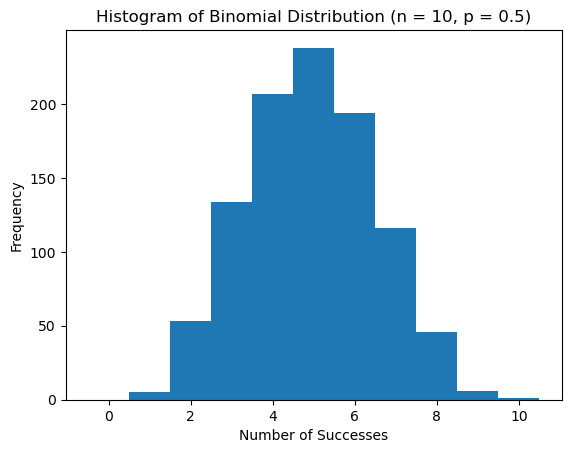

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 10
p = 0.5
size = 1000

data = np.random.binomial(n=n, p=p, size=size)

plt.hist(data, bins=range(0, n + 2), align='left')
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Histogram of Binomial Distribution (n = 10, p = 0.5)")
plt.show()


# Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python

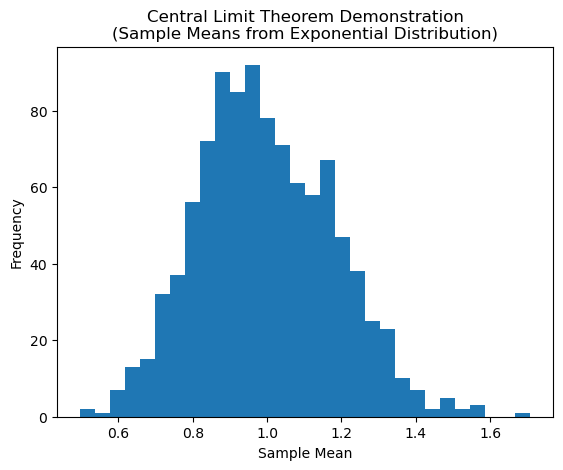

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Parameters
population_size = 100000
sample_size = 30
num_samples = 1000

# Generate a non-normal population (exponential distribution)
population = np.random.exponential(scale=1.0, size=population_size)

# Draw repeated samples and compute sample means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot histogram of sample means
plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem Demonstration\n(Sample Means from Exponential Distribution)")
plt.show()


# Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean

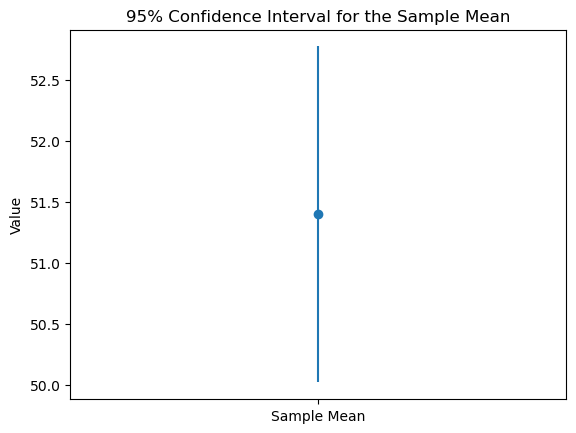

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def confidence_interval_mean(sample, confidence=0.95):
    """
    Calculate confidence interval for the sample mean (Z-based).
    """
    sample = np.array(sample)
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    
    z = norm.ppf((1 + confidence) / 2)
    margin = z * std / np.sqrt(n)
    
    lower = mean - margin
    upper = mean + margin
    
    return mean, lower, upper

# Example data
sample_data = [52, 55, 50, 48, 54, 51, 53, 49, 52, 50]

# Compute confidence interval
mean, lower, upper = confidence_interval_mean(sample_data)

# Visualization
plt.figure()
plt.errorbar(
    x=0,
    y=mean,
    yerr=[[mean - lower], [upper - mean]],
    fmt='o'
)
plt.xticks([0], ["Sample Mean"])
plt.ylabel("Value")
plt.title("95% Confidence Interval for the Sample Mean")
plt.show()


# Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

In [8]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies
observed = np.array([50, 30, 20])

# Expected frequencies
expected = np.array([40, 40, 20])

# Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("Fail to reject null hypothesis")
else:
    print("reject null hypothesis")

Chi-square statistic: 5.0
p-value: 0.0820849986238988
Fail to reject null hypothesis
